In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Packages

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/content/drive/My Drive/Packages


In [ ]:
%cd /content/drive/My Drive/GitHub/empire-migrations-coursework

/content/drive/My Drive/GitHub/empire-migrations-coursework


In [ ]:
projection = '+proj=aea +lat_1=50 +lat_2=70 +lat_0=56 +lon_0=100 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'

# transcultural empire

In [ ]:
ri = gpd.read_file('data/1897RussianEmpire.shp')
ri = ri.to_crs(projection)
ri.head()

,NAMERUS,NAMEENG,AREAV,POPALL,POPCITY,POPRUR,POPW,POPM,LANVRUS,LANLRUS,LANBELORUS,LANPOLISH,LANCZECH,LANBULGARI,LANSERBIAN,LANLITHUAN,LANZHMUDSK,LANLATVIAN,LANMOLDOVA,LANFRENCH,LANITALIAN,LANGERMAN,LANSWEDISH,LANNORWEGI,LANDUTCH,LANENGLISH,LANJEWISH,LANGEORGIA,LANGREEK,LANARMENIA,LANALBANIA,LANPERSIAN,LANTAJIK,LANOSETIN,LANINDUSS,LANROMA,LANCIRCASS,LANLEZGIAN,LANFINNISH,LANVOTYATS,...,LANKURDISH,LANAVGAN,LANKABARDI,LANABKHAZ,LANCHECHEN,LANINGUSH,LANKISTIN,LANAVAR_AN,LANDARGIN,LANKURIN,LANUDIN,LANKAZI_KU,LANOSTYACK,LANVOGULSK,LANKARACHA,LANKUMYK,LANNOGAY,LANKARAPAP,LANKARAKAL,LANKIPCHAK,LANKASHGAR,LANYAKUT,LANBURYAT,LANTUNGUS,LANMANZHUR,LANCHUKOT,LANKORYAK,LANKAMCHAD,LANUKAGIR,LANCHUVAN,LANESKIMO,LANGILYAK,LANAIN,LANALEUT,LANENISEY_,LANJAPANES,LANARABIC,LANAYSORSK,LANOTHERS,geometry
0,Донского Войска область,Voyska Donskogo oblast,144191.6,2564238,318693,2245545,1269918,1294320,1712898,719655,9158,3316,222,269,69,146,12,382,166,450,119,34855,37,9,23,86,15121,107,2255,27234,1,76,0,34,0,1267,71,24,18,27,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((-3508715.464 1031949.989, -3508530.7..."
1,Тифлисская губерния,Tiflisskaya guberniya,39122.0,1051032,224796,826236,475585,575447,79082,6443,247,6282,245,8,2,1263,34,123,198,356,259,8340,37,2,2,37,5188,465537,27118,196189,0,1991,0,67268,0,4,0,0,9,9,...,2538,0,14,46,2207,49,296,34130,7565,1149,4,197,0,0,67,25,18,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1570,31,"POLYGON ((-4084631.121 240696.792, -4081779.28..."
2,Орловская губерния,Orlovskaya guberniya,41057.7,2033798,244008,1789790,1050471,983327,2014127,4174,2984,3422,76,6,7,38,1,339,26,83,3,1406,27,1,0,26,6113,8,22,0,32,18,0,0,0,332,0,0,5,18,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((-3613627.725 1548914.738, -3613630.7..."
3,Самарская губерния,Samarskaya guberniya,145845.9,2751336,158842,2592494,1399898,1351438,1775839,119301,418,1940,56,13,32,650,4,183,155,34,13,224336,19,19,0,4,1669,7,31,31,9,23,0,0,0,802,15,0,21,2118,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,"POLYGON ((-2706437.806 877223.768, -2708099.91..."
4,Нижегородская губерния,Nizhegorodskaya guberniya,45036.7,1584774,143031,1441743,840307,744467,1476391,253,995,1257,13,12,6,63,0,93,1,50,3,912,49,0,0,37,2493,3,12,0,40,6,0,0,0,523,0,0,44,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,"POLYGON ((-3118282.243 1197678.930, -3119239.9..."


In [ ]:
### fix sakhalin
sakhalin = gpd.read_file('data/sakhalin.geojson')
sakhalin = sakhalin.to_crs(projection)
#sakhalin.plot(linewidth=0.5, edgecolor='black', cmap='Greens')
ri.loc[82,'geometry'] = sakhalin.loc[0, 'geometry']

In [ ]:
ri = ri.replace({'Ставропольская область': 'Ставропольская губерния',
              'Могилевская губерния' : 'Могилёвская губерния',
              'Елизаветопольская губерния' : 'Елизаветпольская губерния',
              'Иркутская область' : 'Иркутская губерния',
              'Ревельская губерния' : 'Эстляндская губерния',
              'Петербургская губерния' : 'Санкт-Петербургская губерния',
              'Донского Войска область' : 'Область войска Донского',
              'Сахалин остров' : 'Сахалин',
              'Сырь-Дарьинская область' : 'Сыр-Дарьинская область',
              'Абосская губерния' : 'Або-Бьёрнеборгская губерния'})

In [ ]:
ri = ri.replace({'Stravropolskaya oblast': 'Stravropolskaya guberniya',
              'Irkutskaya oblast' : 'Irkutskaya guberniya',
              'Peterburgskaya guberniya' : 'Sankt-Peterburgskaya guberniya',
              'Voyska Donskogo oblast' : 'Oblast Voyska Donskogo',
              'Abosskaya guberniya' : 'Abo-Bjorneborgskaya guberniya'})

In [ ]:
ri = ri.rename(columns={'NAMERUS': 'name', 'NAMEENG': 'name_eng', 'AREAV' : 'area', 
                   'POPALL' : 'pop_total', 'POPCITY' : 'pop_urban', 'POPRUR' : 'pop_rural', 'POPW' : 'pop_f', 'POPM' : 'pop_m'})

In [ ]:
ri = ri.replace(-1, np.nan)

In [ ]:
languages = ri.iloc[:, np.r_[0, 8:143]]
#languages.to_excel('data/languages.xlsx')
languages.head()

,name,LANVRUS,LANLRUS,LANBELORUS,LANPOLISH,LANCZECH,LANBULGARI,LANSERBIAN,LANLITHUAN,LANZHMUDSK,LANLATVIAN,LANMOLDOVA,LANFRENCH,LANITALIAN,LANGERMAN,LANSWEDISH,LANNORWEGI,LANDUTCH,LANENGLISH,LANJEWISH,LANGEORGIA,LANGREEK,LANARMENIA,LANALBANIA,LANPERSIAN,LANTAJIK,LANOSETIN,LANINDUSS,LANROMA,LANCIRCASS,LANLEZGIAN,LANFINNISH,LANVOTYATS,LANKARELIA,LANIZHORSK,LANCHUDSKO,LANESTONIA,LANLAPP,LANZYRYANS,LANPERMYAT,...,LANTATIAN,LANKURDISH,LANAVGAN,LANKABARDI,LANABKHAZ,LANCHECHEN,LANINGUSH,LANKISTIN,LANAVAR_AN,LANDARGIN,LANKURIN,LANUDIN,LANKAZI_KU,LANOSTYACK,LANVOGULSK,LANKARACHA,LANKUMYK,LANNOGAY,LANKARAPAP,LANKARAKAL,LANKIPCHAK,LANKASHGAR,LANYAKUT,LANBURYAT,LANTUNGUS,LANMANZHUR,LANCHUKOT,LANKORYAK,LANKAMCHAD,LANUKAGIR,LANCHUVAN,LANESKIMO,LANGILYAK,LANAIN,LANALEUT,LANENISEY_,LANJAPANES,LANARABIC,LANAYSORSK,LANOTHERS
0,Область войска Донского,1712898.0,719655.0,9158.0,3316.0,222.0,269.0,69.0,146.0,12.0,382.0,166.0,450.0,119.0,34855.0,37.0,9.0,23.0,86.0,15121.0,107.0,2255.0,27234.0,1.0,76.0,0.0,34.0,0.0,1267.0,71.0,24.0,18.0,27.0,7.0,0.0,13.0,20.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Тифлисская губерния,79082.0,6443.0,247.0,6282.0,245.0,8.0,2.0,1263.0,34.0,123.0,198.0,356.0,259.0,8340.0,37.0,2.0,2.0,37.0,5188.0,465537.0,27118.0,196189.0,0.0,1991.0,0.0,67268.0,0.0,4.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,...,16.0,2538.0,0.0,14.0,46.0,2207.0,49.0,296.0,34130.0,7565.0,1149.0,4.0,197.0,0.0,0.0,67.0,25.0,18.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1570.0,31.0
2,Орловская губерния,2014127.0,4174.0,2984.0,3422.0,76.0,6.0,7.0,38.0,1.0,339.0,26.0,83.0,3.0,1406.0,27.0,1.0,0.0,26.0,6113.0,8.0,22.0,0.0,32.0,18.0,0.0,0.0,0.0,332.0,0.0,0.0,5.0,18.0,0.0,0.0,4.0,25.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Самарская губерния,1775839.0,119301.0,418.0,1940.0,56.0,13.0,32.0,650.0,4.0,183.0,155.0,34.0,13.0,224336.0,19.0,19.0,0.0,4.0,1669.0,7.0,31.0,31.0,9.0,23.0,0.0,0.0,0.0,802.0,15.0,0.0,21.0,2118.0,12.0,0.0,3.0,2029.0,5.0,20.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Нижегородская губерния,1476391.0,253.0,995.0,1257.0,13.0,12.0,6.0,63.0,0.0,93.0,1.0,50.0,3.0,912.0,49.0,0.0,0.0,37.0,2493.0,3.0,12.0,0.0,40.0,6.0,0.0,0.0,0.0,523.0,0.0,0.0,44.0,1.0,1.0,0.0,0.0,90.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
geogr = ri.iloc[:, np.r_[0:8, 143]]
geogr.to_file('data/geography.geojson', driver='GeoJSON')
geogr.head()

,name,name_eng,area,pop_total,pop_urban,pop_rural,pop_f,pop_m,geometry
0,Область войска Донского,Oblast Voyska Donskogo,144191.6,2564238.0,318693.0,2245545.0,1269918.0,1294320.0,"POLYGON ((-3508715.464 1031949.989, -3508530.7..."
1,Тифлисская губерния,Tiflisskaya guberniya,39122.0,1051032.0,224796.0,826236.0,475585.0,575447.0,"POLYGON ((-4084631.121 240696.792, -4081779.28..."
2,Орловская губерния,Orlovskaya guberniya,41057.7,2033798.0,244008.0,1789790.0,1050471.0,983327.0,"POLYGON ((-3613627.725 1548914.738, -3613630.7..."
3,Самарская губерния,Samarskaya guberniya,145845.9,2751336.0,158842.0,2592494.0,1399898.0,1351438.0,"POLYGON ((-2706437.806 877223.768, -2708099.91..."
4,Нижегородская губерния,Nizhegorodskaya guberniya,45036.7,1584774.0,143031.0,1441743.0,840307.0,744467.0,"POLYGON ((-3118282.243 1197678.930, -3119239.9..."


# cities

In [ ]:
cities = pd.read_csv('data/cities.csv')
cities.head()

,name,capital_modern,lat,lon
0,Архангельская губерния,Arkhangelsk,64.5500,40.533300
1,Астраханская губерния,Astrakhan,46.3333,48.016700
2,Петроковская губерния,Piotrkow,51.4000,19.683333
3,Карсская область,Kars,40.6069,43.093100
4,Бакинская губерния,Baku,40.3667,49.835200


In [ ]:
from shapely.geometry import Polygon, Point

In [ ]:
geometry = [Point(i) for i in zip(cities['lon'], cities['lat'])]
cities = gpd.GeoDataFrame(cities, geometry = geometry, crs = 4326).drop(['lat', 'lon'], axis=1)
cities = cities.to_crs(projection)

In [ ]:
cities.head()

,name,capital_modern,geometry
0,Архангельская губерния,Arkhangelsk,POINT (-2460102.380 2132292.235)
1,Астраханская губерния,Astrakhan,POINT (-3649620.122 409422.059)
2,Петроковская губерния,Piotrkow,POINT (-4336068.309 2436721.984)
3,Карсская область,Kars,POINT (-4381395.556 273140.851)
4,Бакинская губерния,Baku,POINT (-3989070.879 -165406.578)


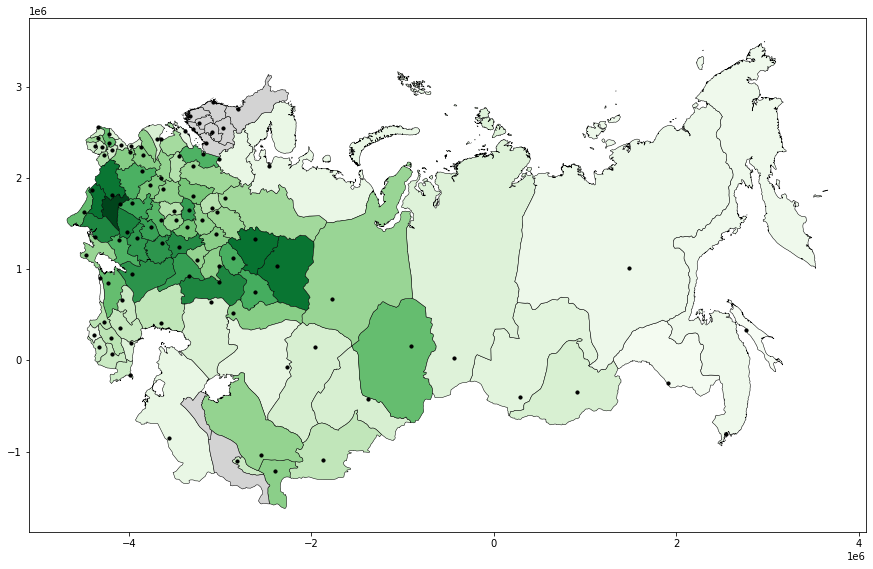

In [ ]:
ax = geogr.plot(figsize=(15, 15), column = 'pop_total', 
                linewidth=0.5, edgecolor='black', cmap='Greens', missing_kwds = {"color": "lightgrey", "label": "Missing values"})
cities.plot(ax=ax, color='black', markersize=10)

# literacy (ristat)

In [ ]:
literacy = pd.read_excel('data/literacy.xlsx', header=8)
literacy = literacy.drop(['Временной срез', 'Тема', 'Ед. изм', 'Counts'], axis=1).replace('нет данных', np.nan)
literacy.head()

,Уровень 1,Уровень 2,Уровень 3,Або-Бьернеборгская губерния,Акмолинская область,Амурская область,Архангельская губерния,Астраханская губерния,Бакинская губерния,Бессарабская губерния,Вазаская губерния,Варшавская губерния,Виленская губерния,Витебская губерния,Владимирская губерния,Вологодская губерния,Волынская губерния,Воронежская губерния,Выборгская губерния,Вятская губерния,Гродненская губерния,Дагестанская область,Екатеринославская губерния,Елисаветпольская губерния,Енисейская губерния,Забайкальская область,Закаспийская область,Закатальский округ Тифлисской губернии,Земля войска Донского,Иркутская губерния,Казанская губерния,Калишская губерния,Калужская губерния,Карская губерния,Келецкая губерния,Киевская губерния,Ковенская губерния,Костромская губерния,Кубанская область,Куопиоская губерния,...,Псковская губерния,Радомская губерния,Рязанская губерния,Самаркандская область,Самарская губерния,Санкт-Михельская губерния,Санкт-Петербургская губерния,Саратовская губерния,Седлецкая губерния,Семипалатинская область,Семиреченская область,Симбирская губерния,Смоленская губерния,Ставропольская губерния,Сувалкская губерния,Сухумский округ Кутаисской губернии,Сырдарьинская область,Тавастгусская губерния,Таврическая губерния,Тамбовская губерния,Тверская губерния,Терская область,Тифлисская губерния без Закатальского округа,Тифлисская губерния вкл. Закатальский округ,Тобольская губерния,Томская губерния,Тульская губерния,Тургайская область,Улеаборгская губерния,Уральская область,Уфимская губерния,Ферганская область,Харьковская губерния,Херсонская губерния,Черниговская губерния,Черноморская губерния,Эриванская губерния,Эстляндская губерния,Якутская область,Ярославская губерния
0,"грамотные, неучившиеся в высших и средних учеб...",женщины,в городах и станицах,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"грамотные, неучившиеся в высших и средних учеб...",женщины,в округах без станиц,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"грамотные, неучившиеся в высших и средних учеб...",женщины,в постах и селах,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"грамотные, неучившиеся в высших и средних учеб...",женщины,вне постов и сел,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"грамотные, неучившиеся в высших и средних учеб...",женщины,город,NaN,6527,2537,5819,14938,9143,26574,NaN,173207,37648,35861,27567,9353,29952,21862,NaN,13500,45029,1930,28829,3612,6252,3053,2544,NaN,NaN,7516,27486,20465,15974,1864,9004,64866,24418,17933,15245,NaN,...,26216,14130,20727,2052,21325,NaN,259232,43943,14292,3552,2818,13780,17450,6057,13231,NaN,6754,NaN,36293,30341,28411,10817,NaN,28508,8754,13209,24860,1289,NaN,7123,12374,2992,38347,102522,24170,2008,3882,28966,573,25353


In [ ]:
check = (literacy['Уровень 3']=='город') | (literacy['Уровень 3']=='в городах и станицах')
literacy['urban'] = np.where(check, 'urban', 'rural')
literacy = literacy.loc[literacy['Уровень 1'] != 'неграмотные']
literacy = literacy.drop(['Уровень 1', 'Уровень 3'], axis=1)

In [ ]:
literacy.iloc[:, 1:102] = literacy.iloc[:, 1:102].astype(float)

In [ ]:
literacy_t = literacy.groupby(['urban', 'Уровень 2']).sum(min_count=1).transpose().reset_index()
literacy_t.columns = ['name', 'literate_rural_f', 'literate_rural_m', 'literate_urban_f', 'literate_urban_m']

In [ ]:
#literacy_t.name.unique()

In [ ]:
literacy_t = literacy_t.replace({
    'Або-Бьернеборгская губерния' : 'Або-Бьёрнеборгская губерния',
    'Земля войска Донского' : 'Область войска Донского',
    'Кутаисская  губерния вкл. Сухумский округ' : 'Кутаисская губерния',
    'Остров Сахалин' : 'Сахалин',
    'Сырдарьинская область' : 'Сыр-Дарьинская область',
    'Тифлисская губерния вкл. Закатальский округ' : 'Тифлисская губерния',
    'Могилевская губерния' : 'Могилёвская губерния',
    'Тургайская область ' : 'Тургайская область',
    'Елисаветпольская губерния' : 'Елизаветпольская губерния',
    'Карская губерния' : 'Карсская область'
})

In [ ]:
literacy_t['literate_rural'] = literacy_t['literate_rural_f'] + literacy_t['literate_rural_m']
literacy_t['literate_urban'] = literacy_t['literate_urban_f'] + literacy_t['literate_urban_m']
literacy_t['literate_f'] = literacy_t['literate_rural_f'] + literacy_t['literate_urban_f']
literacy_t['literate_m'] = literacy_t['literate_rural_m'] + literacy_t['literate_urban_m']
literacy_t['literate_total'] = literacy_t['literate_rural_m'].fillna(0) + literacy_t['literate_urban_m'].fillna(0) + literacy_t['literate_rural_f'].fillna(0) + literacy_t['literate_urban_f'].fillna(0)

In [ ]:
pop = geogr[['name', 'pop_total', 'pop_urban', 'pop_rural', 'pop_f', 'pop_m']]
lit = literacy_t[['name', 'literate_rural', 'literate_urban', 'literate_m', 'literate_f', 'literate_total']]
pop_lit = pd.merge(pop, lit)

In [ ]:
for i in ('rural', 'urban', 'm', 'f', 'total'):
  pop_lit[f'lit_rate_{i}'] = pop_lit[f'literate_{i}'] / pop_lit[f'pop_{i}']

lit_rate = pop_lit[['name'] + [f'lit_rate_{i}' for i in ('rural', 'urban', 'm', 'f', 'total')]]

lit_rate.to_csv('data/lit_rate.csv', index=False)

In [ ]:
lit_rate.head()

,name,lit_rate_rural,lit_rate_urban,lit_rate_m,lit_rate_f,lit_rate_total
0,Область войска Донского,0.195023,0.429357,0.348377,0.097530,0.224147
1,Тифлисская губерния,0.081615,0.461156,0.195076,0.123728,0.162791
2,Орловская губерния,0.138698,0.453006,0.286575,0.073281,0.176407
3,Самарская губерния,0.209016,0.413669,0.303299,0.141217,0.220831
4,Нижегородская губерния,0.191989,0.503087,0.343513,0.110700,0.220067


# assemble regions

In [ ]:
geogr = gpd.read_file('data/geography.geojson', crs = projection)
macroregions = pd.read_csv('data/macroregions.csv')
lit_rate = pd.read_csv('data/lit_rate.csv')

In [ ]:
regions = geogr.merge(macroregions, on='name', how = 'left').merge(lit_rate, on='name', how = 'left')
regions.to_file('data/regions.geojson', driver='GeoJSON')
regions.head()

,name,name_eng,area,pop_total,pop_urban,pop_rural,pop_f,pop_m,geometry,macroregion,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,lit_rate_rural,lit_rate_urban,lit_rate_m,lit_rate_f,lit_rate_total
0,Область войска Донского,Oblast Voyska Donskogo,144191.6,2564238.0,318693.0,2245545.0,1269918.0,1294320.0,"POLYGON ((-3508715.464 1031949.989, -3508530.7...",European Russia,NaN,NaN,NaN,NaN,0.195023,0.429357,0.348377,0.097530,0.224147
1,Тифлисская губерния,Tiflisskaya guberniya,39122.0,1051032.0,224796.0,826236.0,475585.0,575447.0,"POLYGON ((-4084631.121 240696.792, -4081779.28...",Caucasus,NaN,NaN,NaN,NaN,0.081615,0.461156,0.195076,0.123728,0.162791
2,Орловская губерния,Orlovskaya guberniya,41057.7,2033798.0,244008.0,1789790.0,1050471.0,983327.0,"POLYGON ((-3613627.725 1548914.738, -3613630.7...",European Russia,NaN,NaN,NaN,NaN,0.138698,0.453006,0.286575,0.073281,0.176407
3,Самарская губерния,Samarskaya guberniya,145845.9,2751336.0,158842.0,2592494.0,1399898.0,1351438.0,"POLYGON ((-2706437.806 877223.768, -2708099.91...",European Russia,NaN,NaN,NaN,NaN,0.209016,0.413669,0.303299,0.141217,0.220831
4,Нижегородская губерния,Nizhegorodskaya guberniya,45036.7,1584774.0,143031.0,1441743.0,840307.0,744467.0,"POLYGON ((-3118282.243 1197678.930, -3119239.9...",European Russia,NaN,NaN,NaN,NaN,0.191989,0.503087,0.343513,0.110700,0.220067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Нюландская губерния,Nyulandskaya guberniya,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-3166598.587 2516634.318, -316...",Finland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,Енисейская губерния,Eniseyskaya guberniya,2233929.5,570161.0,62884.0,507277.0,271193.0,298968.0,"MULTIPOLYGON (((-83178.843 2760391.863, -82854...",Siberia,NaN,NaN,NaN,NaN,0.105658,0.390878,0.200145,0.067631,0.137116
96,Якутская область,Yakutskaya oblast,3468800.0,269880.0,9182.0,260698.0,130283.0,139597.0,"MULTIPOLYGON (((1340778.283 2950901.537, 13406...",Siberia,NaN,NaN,NaN,NaN,0.032279,0.291331,0.063676,0.016894,0.041092
97,Тобольская губерния,Tobolskaya guberniya,1219229.7,1433043.0,87351.0,1345692.0,726545.0,706498.0,"MULTIPOLYGON (((-911905.610 2167664.150, -9063...",Siberia,NaN,NaN,NaN,NaN,0.095466,0.380248,0.177279,0.050150,0.112825


# assemble interactions

In [ ]:
migrations = pd.read_excel('data/migrations.xlsx')
migrations.head()

,name_i,name_j,rural_m,rural_f,urban_m,urban_f
0,Астраханская губерния,Архангельская губерния,10,0,7,3
1,Бессарабская губерния,Архангельская губерния,3,4,6,6
2,Виленская губерния,Архангельская губерния,11,1,145,25
3,Витебская губерния,Архангельская губерния,24,9,141,12
4,Владимирская губерния,Архангельская губерния,67,30,59,35


In [ ]:
migrations['mig_total'] = migrations['rural_m'] + migrations['rural_f'] + migrations['urban_m'] + migrations['urban_f']

## join vars

In [ ]:
def join_var(df, var_df):
  for k in 'i', 'j':
    var_df_k = var_df.add_suffix(f'_{k}')
    df = pd.merge(df, var_df_k, on=f'name_{k}')
  return df

def join_vars(df, vars_df_list):
  for var_df in vars_df_list:
    df = join_var(df, var_df)
  return df

In [ ]:
suffixes = ('total', 'urban', 'rural', 'f', 'm')
pop = regions[['name']+[f'pop_{i}' for i in suffixes]]
lit = regions[['name']+[f'lit_rate_{i}' for i in suffixes]]

migrations = join_vars(migrations, [pop, lit])

## dist

In [ ]:
def join_dist(df, dist_df, how='centroids'):
  dist_temp = join_var(df, dist_df)
  if how=='centroids':
    c_i = gpd.GeoSeries(dist_temp['geometry_i'], crs = projection).centroid
    c_j = gpd.GeoSeries(dist_temp['geometry_j'], crs = projection).centroid
  elif how=='capitals':
    c_i = gpd.GeoSeries(dist_temp['geometry_i'], crs = projection)
    c_j = gpd.GeoSeries(dist_temp['geometry_j'], crs = projection)
  else:
    raise ValueError
  df[f'distance_{how}'] = c_i.distance(c_j) / 1000
  return df

In [ ]:
migrations_dist = join_dist(migrations, cities, how='capitals')
migrations_dist = join_dist(migrations_dist, regions[['name', 'geometry']], how='centroids')

In [ ]:
migrations_dist.to_csv('data/interactions.csv')
migrations_dist.head()

,name_i,name_j,rural_m,rural_f,urban_m,urban_f,mig_total,pop_total_i,pop_urban_i,pop_rural_i,pop_f_i,pop_m_i,pop_total_j,pop_urban_j,pop_rural_j,pop_f_j,pop_m_j,lit_rate_total_i,lit_rate_urban_i,lit_rate_rural_i,lit_rate_f_i,lit_rate_m_i,lit_rate_total_j,lit_rate_urban_j,lit_rate_rural_j,lit_rate_f_j,lit_rate_m_j,distance_capitals,distance_centroids
0,Астраханская губерния,Архангельская губерния,10,0,7,3,20,1003542.0,132502.0,871040.0,490089.0,513453.0,346536.0,34044.0,312492.0,182752.0,163784.0,0.138129,0.386070,0.100412,0.073619,0.199703,0.233774,0.520268,0.202562,0.117175,0.363876,2093.617468,2247.587377
1,Бессарабская губерния,Архангельская губерния,3,4,6,6,19,1935412.0,293332.0,1642080.0,944173.0,991239.0,346536.0,34044.0,312492.0,182752.0,163784.0,0.155612,0.328444,0.124739,0.088337,0.219694,0.233774,0.520268,0.202562,0.117175,0.363876,2089.805591,2555.709160
2,Виленская губерния,Архангельская губерния,11,1,145,25,182,1591207.0,198007.0,1393200.0,800327.0,790880.0,346536.0,34044.0,312492.0,182752.0,163784.0,0.288314,0.513830,0.256263,0.229764,0.347563,0.233774,0.520268,0.202562,0.117175,0.363876,1393.490293,1822.196625
3,Витебская губерния,Архангельская губерния,24,9,141,12,186,1489246.0,215919.0,1273327.0,752364.0,736882.0,346536.0,34044.0,312492.0,182752.0,163784.0,0.246403,0.459274,0.210306,0.195415,0.298462,0.233774,0.520268,0.202562,0.117175,0.363876,1197.999682,1606.159442
4,Владимирская губерния,Архангельская губерния,67,30,59,35,191,1515691.0,190618.0,1325073.0,825379.0,690312.0,346536.0,34044.0,312492.0,182752.0,163784.0,0.270322,0.479582,0.240218,0.134172,0.433110,0.233774,0.520268,0.202562,0.117175,0.363876,951.244669,1322.618189


# draw maps

In [ ]:
regions = gpd.read_file('data/regions.geojson', crs = projection)
data = pd.read_csv('data/interactions.csv')

In [ ]:
data_from = data.groupby('name_i').agg({'mig_total' : 'sum', 'pop_total_i' : 'first'}).reset_index()
data_from = regions[['geometry', 'name']].merge(data_from, how='left', left_on=['name'], right_on=['name_i'])
data_from.crs = projection
data_from['mig_of_pop'] = data_from['mig_total'] / data_from['pop_total_i']

In [ ]:
#data_from[data_from['mig_total'].isnull()]

In [ ]:
params = {'figsize' : (15, 15), 
          'linewidth' : 0.5, 
          'edgecolor' : 'black', 
          'cmap' : 'Greens', 
          'missing_kwds' : {"color": "lightgrey", "label": "Missing values"},
          'legend' : True,
          'legend_kwds' : {'shrink': 0.5}
          }

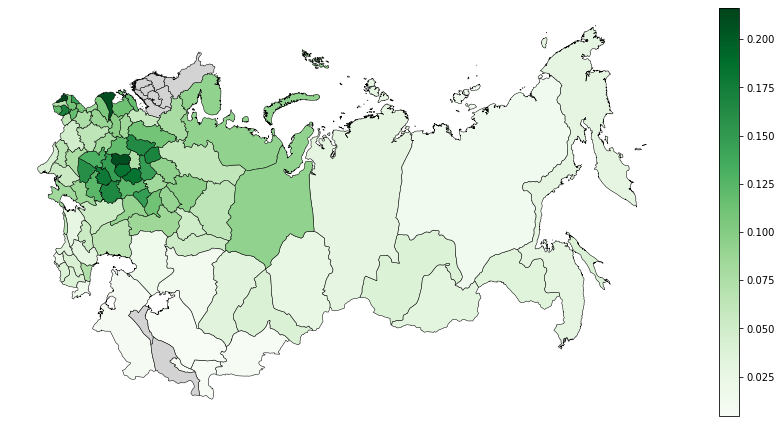

In [ ]:
data_from.plot(column = 'mig_of_pop', **params).axis('off')

plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)

In [ ]:
data_to = data.groupby('name_j').agg({'mig_total' : 'sum', 'pop_total_j' : 'first'}).reset_index()
data_to = regions[['geometry', 'name']].merge(data_to, how='left', left_on=['name'], right_on=['name_j'])
data_to.crs = projection
data_to['mig_of_pop'] = data_to['mig_total'] / data_to['pop_total_j']

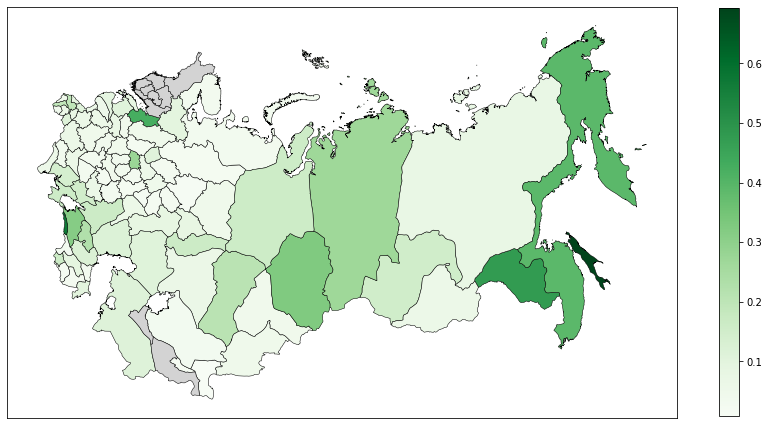

In [ ]:
data_to.plot(column = 'mig_of_pop', **params).tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False) 

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)

In [ ]:
def plot_region(df, regions, reg_name, how='to', plot_params = {}):
  if how=='to':
      t='j'
      r='i'
  elif how=='from':
      t='i'
      r='j'
  else:
    raise ValueError

  df_reg = df.loc[df[f'name_{t}'] == reg_name]
  df_reg = regions[['geometry', 'name']].merge(df_reg, how='left', left_on=['name'], right_on=[f'name_{r}'])
  df_reg.crs = projection

  reg = df_reg[df_reg['name'] == reg_name]

  index = df_reg.index[df_reg['name'] == reg_name]
  df_reg = df_reg.drop(index, axis=0)
  
  main_plot = df_reg.plot(column = f'mig_total', **plot_params)
  reg.plot(ax = main_plot, facecolor = "white", hatch = "///", linewidth = params['linewidth'], edgecolor = params['edgecolor'])
  main_plot.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False) 
  plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
  plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)


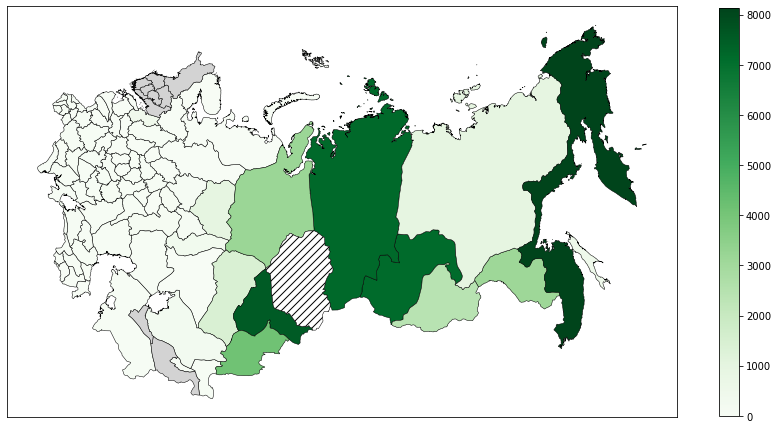

In [ ]:
plot_region(data, regions, 'Томская губерния', how='from', plot_params = params)

In [ ]:
params1 = {
    'figsize' : (15, 15), 
          'linewidth' : 0.5, 
          'edgecolor' : 'black', 
          #'cmap' : 'Greens', 
          'missing_kwds' : {"color": "lightgrey", "label": "Missing values"},
          'legend' : True,
          'legend_kwds' : {'shrink': 0.5}
          }

In [ ]:
params = {
    'figsize' : (15, 15), 
          'linewidth' : 0.5, 
          'edgecolor' : 'black', 
          'cmap' : 'Greens', 
          #'missing_kwds' : {"color": "lightgrey", "label": "Missing values"},
          'legend' : True,
          'legend_kwds' : {'shrink': 0.5}
          }

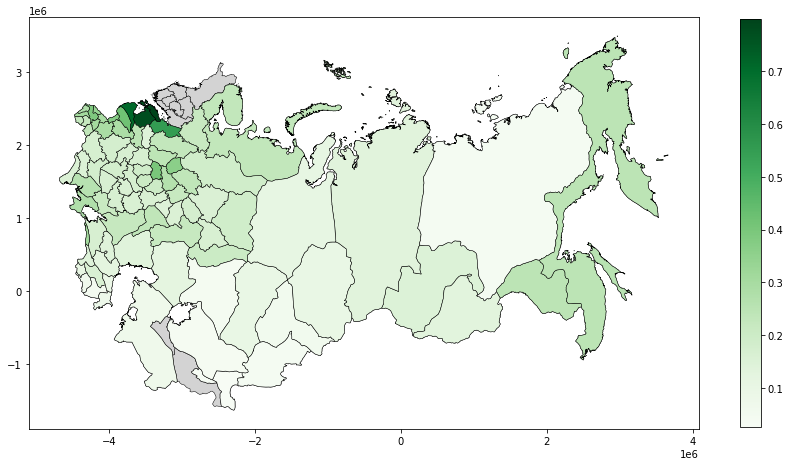

In [ ]:
ax = regions.plot(color = 'lightgrey', **params1)
regions.plot(ax=ax, column = 'lit_rate_total', **params)

# summary stats